In [18]:
import numpy as np
import pandas as pd
from pandas import read_csv

In [19]:
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# load the dataset
df = read_csv(url, header=None)
# summarize shape
print(df.shape)

(306, 4)


                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


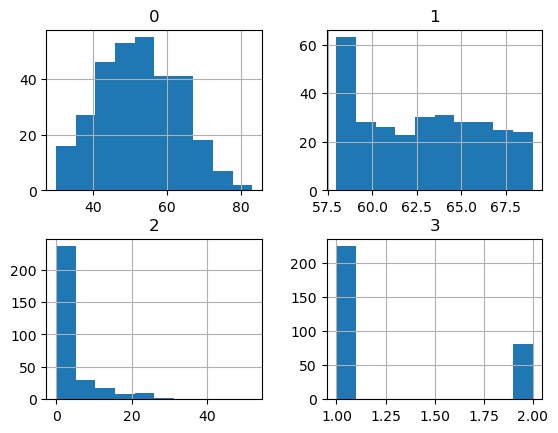

In [20]:
# show summary statistics and plots of the haberman dataset
from matplotlib import pyplot
# show summary statistics
print(df.describe())
# plot histograms
df.hist()
pyplot.show()

In [21]:
# summarize the class ratio of the haberman dataset
from pandas import read_csv
from collections import Counter
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']
# load the csv file as a data frame
dataframe = read_csv(url, header=None, names=columns)
# summarize the class distribution
target = dataframe['class'].values
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


# <center> Neural Network Learning Dynamics


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Input

# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Input(shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal',))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))

In [25]:
from sklearn.metrics import accuracy_score

# predict test set
yhat = model.predict(X_test)
# convert probabilities to binary predictions
yhat_binary = (yhat > 0.5).astype(int)
# evaluate predictions
score = accuracy_score(y_test, yhat_binary)
print('Accuracy: %.3f' % score)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020C4C796D40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.758


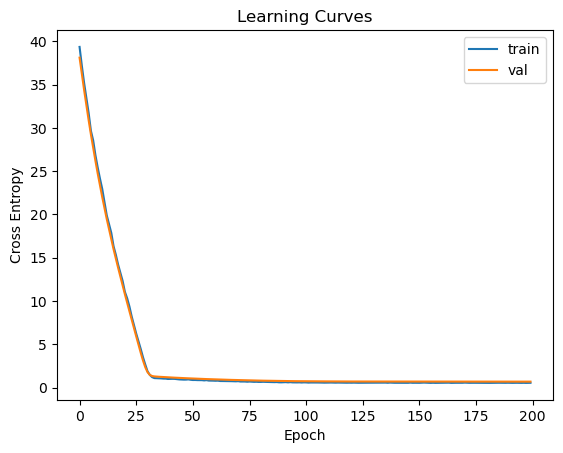

In [26]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# <center> Robust Model Evaluation

In [27]:
# k-fold cross-validation of base model for the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# prepare cross validation
kfold = StratifiedKFold(10, random_state=1, shuffle=True)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Input(shape=(n_features,)))
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal',))
	model.add(Dense(1, activation='sigmoid'))
	# compile the model
	model.compile(optimizer='adam', loss='binary_crossentropy')
	# fit the model
	model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
	# predict test set
	yhat = model.predict(X_test)
	# convert probabilities to binary predictions
	yhat_binary = (yhat > 0.5).astype(int)
	# evaluate predictions
	score = accuracy_score(y_test, yhat_binary)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
>0.677
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
>0.774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
>0.774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
>0.774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
>0.774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
>0.742
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
>0.700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
>0.767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
>0.733
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
>0.833
Mean Accuracy: 0.755 (0.042)


# <center> Final Model and Make Predictions

In [33]:
# fit a final model and make predictions on new data for the haberman dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
le = LabelEncoder()
y = le.fit_transform(y.to_numpy())
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Input(shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal',))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=200, batch_size=16, verbose=0)
# define a row of new data
row = np.array([30, 64, 1]).reshape(1, -1)
# Faire la prédiction
yhat = model.predict(row)
# Convertir les probabilités en classes prédites
yhat_class = (yhat > 0.5).astype(int)
# Inverser la transformation pour obtenir l'étiquette de la classe
yhat_label = le.inverse_transform(yhat_class)
# Afficher la prédiction
print('Predicted:', yhat_label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted: 1


c:\Users\GRETA\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
